In [68]:
from io import BytesIO

import cairo
import IPython.display
import math

In [26]:
# def circle(ctx, xparam, yparam):
#     x, y, x1, y1 = xparam, yparam, 0.4, 0.9
#     x2, y2, x3, y3 = 0.6, 0.1, 0.9, 0.5
# #     ctx.scale(200, 200)
# #     ctx.set_line_width(0.04)
# #     ctx.move_to(x, y)
#     ctx.curve_to(x1, y1, x2, y2, x3, y3)
#     ctx.stroke()
#     ctx.set_source_rgba(1, 0.2, 0.2, 0.6)
#     ctx.set_line_width(0.02)
#     ctx.move_to(x, y)
#     ctx.line_to(x1, y1)
#     ctx.move_to(x2, y2)
#     ctx.line_to(x3, y3)
#     ctx.stroke()

In [130]:
def circle(ctx, x, y):
    ctx.set_line_width(0.45)
    ctx.arc(x, y, 0.22, 0, 2*math.pi)
    ctx.stroke()

In [138]:
def circle_row(ctx, n, x_origin, y_origin):
    for c in range(n):
        circle(ctx, x_origin + c, y_origin)

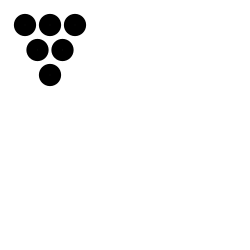

In [143]:
svgio = BytesIO()

with cairo.SVGSurface(svgio, 250, 250) as surface:
    ctx = cairo.Context(surface)
    ctx.scale(25, 25)
    circle_row(ctx, 3, 1, 1)
    circle_row(ctx, 2, 1.5, 2)
    circle_row(ctx, 1, 2, 3)

IPython.display.SVG(data=svgio.getvalue())